# SKLearn

%% TODO intro
ML

In real life, we wouldn't implement each algorithm from zero (remember, **Don't reinvent the wheel**). There exist multiple libraries for different languages that implement highly optimized and highly parameterizable versions of those algorithms.

For Python, one of the most used libraries is *Scikit-Learn* (also known as *sklearn*).

In this notebook we will see how we can use this library to do:

1. Supervised learning
    - Train-test split
    - Classification using **Decision Trees**
    - Classification using **Naive Bayes**
2. Unsupervised learning
    - Clustering using **K-Means**
3. Evaluate models
    - Cross validation
4. Transformations and pipelines
    - Transform data
    - Combine transforms and models: pipelines


Let's start by installing the framework to our environment:

In [1]:
!pip install scikit-learn

## Load our dataset

First, we want to load a toy dataset. The iris dataset is a classification dataset that contains observations of 3 types of flowers.

Sklearn provides functions to load those toy datasets, otherwise we could use pandas for example to read from a file or a URL.

The function `load_iris` present in the `sklearn.datasets` module return a dictionary with the dataset values and some descriptors.

In [2]:
from sklearn.datasets import load_iris

loaded = load_iris()

print(loaded.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


We have loaded a dictionary with:

- `data`: The matrix of the attributes, as a numpy array of shape [rows, features]
- `target`: The label assigned for each row, as a numpy array of shape [rows]
- `feature_names`: The name of each column of the `data` matrix
- `target_names`: As the target is a numpy array, it is composed by numeric values. This item contains a list of the names corresponding to each value
- `DESCR`: The full description of the dataset
- `filename`: The path location of the data

We will try to recreate the `frame` returned using pandas with the other attributes.

First, let's start by seeing the rows with both the features and their labels. We can use numpy indexing to show only the first 5 rows:

In [3]:
print(loaded.data[:5,], end="\n\n")
print(loaded.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We can get some descriptive names for those numbers that we saw:

In [4]:
print(loaded.feature_names)
print(loaded.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


The feature names are the names assigned to each column of the `data` array.

The target names show us that when we find the number 0 in the `target` array, we know it is a flower of the class *setosa*. Same goes for 1: *versicolor* and 2: *virginica*.

### Convert raw data to a dataframe

*In the 0.23 version, SKlearn added the `as_frame` parameter to the `load_dataset` method. For educational purposes, we ignored this parameter and we will create the dataframe manually*

We have all the data, the target, the columns names... We can use the "magic" of Pandas to create a dataframe that contains all this information:

In [5]:
import pandas

iris_dataset = pandas.DataFrame(loaded.data, columns=loaded.feature_names)

# iris_dataset.insert(4, "Label", loaded.target)
iris_dataset["Label"] = loaded.target

iris_dataset.head()  # Get only the first rows of the dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ugh, the label is still numeric. This is not very intuitive... As we have the real names, we can transform the last column to show the real name of the flower applying a function to each row (axis=0 by default).

In [10]:
iris_dataset["Label"] = iris_dataset["Label"].apply(
    lambda idx: loaded.target_names[idx]
)

iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Much better, we now have our data prepared to be feed to our algorithms.

## Models

### Preparing our sets

In ML, we want to find models that can perform well on unseen data. To do so, we will split our data into two sets: **train** and **test**. We can use the functions from sklearn to do it:

In [11]:
iris_dataset.shape

(150, 5)

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(iris_dataset, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [13]:
test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor
31,5.4,3.4,1.5,0.4,setosa
64,5.6,2.9,3.6,1.3,versicolor
141,6.9,3.1,5.1,2.3,virginica
68,6.2,2.2,4.5,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor


### Classification
Let's try to create a classifier that, given a sepal length and width, and a petal length and width; it will assign the class of flower we are looking for.

To classify the different observations, we will train a first a decision tree, and then see how many changes we have to do to train another classification model (naive bayes).

#### Decision tree

Let's start by showing how to use the `DecisionTreeClassifier` class from sklearn.

We will use a decision tree that splits based on the Gini score, limits the tree to have at most a depth of 3 levels (this is, classify taking at most 3 decisions), and to create a leaf it requires at least 10 observations to reach this leaf.

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_leaf=10,
    random_state=42
)

dt_classifier

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

We have our classifier, created, so let's start the training of our model with the training data. In the context of sklearn, this is known as *fitting* the model (i.e. learning the values of a model to describe a dataset).

The fit method expects at least two values:
- X: contains the features of each row
- y: contains the targets of each row

In [15]:
X_train = train.drop("Label", 1)  # Get only the features
y_train = train["Label"]  # Get only the target

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

The tree now is trained.

We can even get a representation of the tree using the `plot_tree` function *(added in version 0.21)*.

We will need matplotlib installed to use this function:

In [16]:
!pip install matplotlib

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 2.55\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 5.05\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(209.25, 27.180000000000007, 'gini = 0.463\nsamples = 11\nvalue = [0, 4, 7]'),
 Text(292.95, 27.180000000000007, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

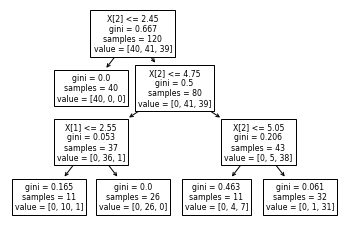

In [17]:
from sklearn.tree import plot_tree

plot_tree(dt_classifier)

We can classify some rows using the `predict` function. Note that this function expects an entire dataset, so if we want to classify a single row we have to create an array with one element.

In [21]:
X_test = test.drop("Label", 1)
y_test = test["Label"]

row = X_test.iloc[1,:]

print(row)
print("Expected class is:", y_test.iloc[1])
print("Assigned class is:", dt_classifier.predict([row]))

sepal length (cm)    5.7
sepal width (cm)     3.8
petal length (cm)    1.7
petal width (cm)     0.3
Name: 18, dtype: float64
Expected class is: setosa
Assigned class is: ['setosa']


##### Evaluate the accuracy of the model

We would like to know how  well our decision tree classifies. To do so, we can use the accuracy of the model on our test set.

The accuracy is defined as:
$$
accuracy = \frac{\text{correctly classified rows}}{\text{total rows}}
$$

Fortunately, the models from *sklearn* implement already the `score` method:

In [22]:
dt_classifier.score(X_test, y_test) * 100

96.66666666666667

The tree that we found classifies $96,6\%$ of the test set rows correctly.

#### Naive Bayes

Let's try to use another algorithm to classify the dataset. We will use the Naive Bayes algorithm. Sklearn provides multiple implementations of this algorithm, and for this example we will use the Gaussian Naive Bayes model.

In [23]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

nb_classifier

GaussianNB()

With the model created, we can fit it with our training data:

In [24]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

**Yes, it is the same we did for the decision tree. The advantage of the SKlearn framework is that it provides a common interface for working with the models. This is why we implemented the KMeans class using this interface.**

The SKLearn models usually implement the following methods:\
*see https://scikit-learn.org/stable/developers/develop.html for more details*

- `.fit(data, [targets])` (targets is ignored for unsupervised algorithms).
- `.predict(data)`
- `.score(data, [targets])`

Thus, all the models that we are using will have those methods.

The accuracy for the new model is:

In [27]:
print(nb_classifier.score(X_test, y_test))

1.0


Wow, we found a perfect classifier! Actually, don't get excited too early, as this is a really easy dataset, and for the decision tree we used some tweaking of its parameters to get a non-perfect tree (try to change the parameters until you get a perfect decision tree).

**Note 1: In the real world, finding perfect models for unknown data (i.e. test set) is really hard, if not impossible.**

**Note 2: We can also get the score for the training dataset. Usually, having a perfect score for a training dataset means that our model will result in a bad model for unknown data (this is known as overfiting).**

Later on we will come back to this.

### Clustering

We have a set of three types of flowers. We already know that, so we will be cheating a little bit for the following models.

We want to try to cluster all the flowers in disctinct groups. To do so, we will ignore the `Label` of the dataset.

In [28]:
import pandas

iris_dataset = pandas.DataFrame(loaded.data, columns=loaded.feature_names)

iris_dataset.head()  # Get only the first rows of the dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We can visualize the data to have a preview of the result we want. 

We can use matplotlib to visualize data.

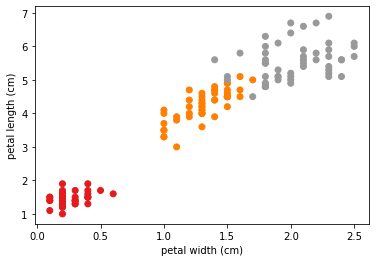

In [35]:
import matplotlib.pyplot as plt

x_column = "petal width (cm)"
y_column = "petal length (cm)"

plt.scatter(iris_dataset[x_column],
            iris_dataset[y_column],
            c=loaded.target,  # <- we cheat here, and we show the label
            cmap=plt.cm.Set1)
plt.xlabel(x_column)
plt.ylabel(y_column)

plt.show()

To cluster the flowers we will use the KMeans algorithm.

We will use the following parameters:

- n_clusters: The number of clusters we want to find
- init: how do we init the centroids. We will use random as we used in our algorithm
- n_init: Number of times the k-means algorithm will be run with different centroids as starting point.
- max_iter: Maximum number of steps we will allow the algorithm to execute for each run.
- verbose: 1, show the training process

In [47]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, init="random", n_init=5, max_iter=200, verbose=1)

kmeans_model

KMeans(init='random', max_iter=200, n_clusters=3, n_init=5, verbose=1)

In [48]:
kmeans_model.fit(iris_dataset)

Initialization complete
Iteration 0, inertia 180.38000000000002
Iteration 1, inertia 87.06161791132845
Iteration 2, inertia 82.13703391490664
Iteration 3, inertia 81.08093414092329
Iteration 4, inertia 79.87357983461304
Iteration 5, inertia 79.34436414532675
Iteration 6, inertia 78.92130972222225
Iteration 7, inertia 78.85566582597727
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 143.49000000000007
Iteration 1, inertia 82.54210893336928
Iteration 2, inertia 80.06802031163697
Iteration 3, inertia 79.34436414532675
Iteration 4, inertia 78.92130972222225
Iteration 5, inertia 78.85566582597727
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 220.46999999999997
Iteration 1, inertia 145.46386092322393
Iteration 2, inertia 144.60527318215097
Iteration 3, inertia 144.17125349400825
Iteration 4, inertia 143.74764944714198
Iteration 5, inertia 143.56290177914732
Iteration 6, inertia 143.5137806560068
Iteration

KMeans(init='random', max_iter=200, n_clusters=3, n_init=5, verbose=1)

In [49]:
kmeans_model.inertia_

78.85566582597727

How we interpret the output of the training process?

At each iteration, it reports the inertia. The inertia in this context is the sum of squared distances of the samples to their closest cluster center. Remember that the objective of KMeans is to minimize this.

The training process will execute the KMeans algorithm 5 times, and use the result of the one that has the smallest inertia.


We can obtain the assigned clusters for all the rows with the `predict` function:

In [50]:
assigned = kmeans_model.predict(iris_dataset)

assigned

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

And print the same plot we had before, to see how the clusters are separated.

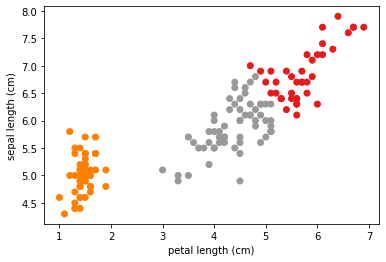

In [51]:
x_column = "petal length (cm)"
y_column = "sepal length (cm)"

plt.scatter(iris_dataset[x_column],
            iris_dataset[y_column],
            c=assigned,  # Instead of using the true label, we can set the color based on the assigned cluster
            cmap=plt.cm.Set1)
plt.xlabel(x_column)
plt.ylabel(y_column)

plt.show()

We can even show the centroids found (in blue):

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


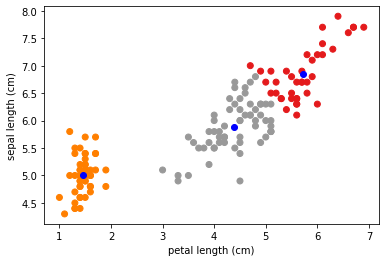

In [52]:
print(kmeans_model.cluster_centers_)

x_column = "petal length (cm)"
y_column = "sepal length (cm)"
x_column_idx = iris_dataset.columns.get_loc(x_column)
y_column_idx = iris_dataset.columns.get_loc(y_column)

plt.scatter(iris_dataset[x_column],
            iris_dataset[y_column],
            c=assigned,  # Instead of using the true label, we can set the color based on the assigned cluster
            cmap=plt.cm.Set1)
plt.scatter(kmeans_model.cluster_centers_[:,x_column_idx],
            kmeans_model.cluster_centers_[:,y_column_idx], c="blue")
plt.xlabel(x_column)
plt.ylabel(y_column)

plt.show()

## Model evaluation

Up to this point we have evaluated each model just checking the accuracy on the test data. This is usually a first approach, but the selection of a good training and test split is something we don't know how to do yet, and we are splitting those sets randomly.

If we select a bad train split, we might discard a model or its hyperparameters because the accuracy is bad or it does overfit.

In order to mitigate the randomness nature of the split, we will use a technique called **cross validation**.


Cross validation is a technique that is performed before evaluating a model against the test dataset.

First, it splits the train dataset in `N` disjoint subsets, called folds. Then, it trains the model with all the folds but one, which will be used to test the accuracy. This is repeated for each fold, and all the accuracies found are averaged (or other metric).

![Cross-validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

We can compare the resulting averages of accuracies from different models/hyperparameters to check which parameters are better for a specific train set.

Then, we perform the final evaluation step against the test set.

Using this technique, we can have more confidence about the selected model and hyperparameters.

Let's see how we can do this using Sklearn. First, we will implement the iteration manually, and then we will use the method `cross_validate` to evaluate an entire model.

First, prepare the dataset:

In [53]:
loaded = load_iris(as_frame=True)

X_iris = loaded.data
y_iris = loaded.target

X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [54]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy

kf = KFold(n_splits=5)

model_class = KNeighborsClassifier
arguments_to_try = [
    {"n_neighbors": 3},
    {"n_neighbors": 5}
]

for kwargs in arguments_to_try:
    print("\n")
    print("Testing arguments", kwargs)    

    accuracies = []
    
    # Cross validation:
    
    for train_folds_idx, validation_fold_idx in kf.split(train):
        print(f"{train_folds_idx.shape}, {validation_fold_idx.shape}")
        
        model = model_class(**kwargs)
        model.fit(X_train.iloc[train_folds_idx],
                  y_train.iloc[train_folds_idx])
        
        accuracy = model.score(X_train.iloc[validation_fold_idx],
                               y_train.iloc[validation_fold_idx])
        
        accuracies.append(accuracy)

    # End cross validation for the model
        
    print(accuracies)
    print("Mean accuracy is", numpy.mean(accuracies))



Testing arguments {'n_neighbors': 3}
(96,), (24,)
(96,), (24,)
(96,), (24,)
(96,), (24,)
(96,), (24,)
[0.9583333333333334, 1.0, 0.9166666666666666, 0.9166666666666666, 0.9583333333333334]
Mean accuracy is 0.95


Testing arguments {'n_neighbors': 5}
(96,), (24,)
(96,), (24,)
(96,), (24,)
(96,), (24,)
(96,), (24,)
[0.9583333333333334, 0.9583333333333334, 0.875, 0.9583333333333334, 0.9583333333333334]
Mean accuracy is 0.9416666666666668


Now that we know how it works, we can use the function `cross_validate` that hides all the steps from us.

In [55]:
from sklearn.model_selection import cross_validate
import pprint

loaded = load_iris(as_frame=True)

X_iris = loaded.data
y_iris = loaded.target

X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42)

model_class = KNeighborsClassifier
arguments_to_try = [
    {"n_neighbors": 3},
    {"n_neighbors": 5}
]

for kwargs in arguments_to_try:
    print("\nTesting arguments", kwargs)    
    model = model_class(**kwargs)
    
    accuracies = cross_validate(model, X_train, y_train, cv=5)
    pprint.pprint(accuracies)
    print("Mean accuracy is", numpy.mean(accuracies["test_score"]))


Testing arguments {'n_neighbors': 3}
{'fit_time': array([0.00274801, 0.00223994, 0.00206947, 0.00184035, 0.00173092]),
 'score_time': array([0.00349569, 0.00277758, 0.00292063, 0.00239396, 0.00239253]),
 'test_score': array([0.95833333, 1.        , 0.875     , 1.        , 0.95833333])}
Mean accuracy is 0.9583333333333334

Testing arguments {'n_neighbors': 5}
{'fit_time': array([0.00183368, 0.00188398, 0.00175047, 0.00175548, 0.00150037]),
 'score_time': array([0.00778389, 0.00231314, 0.00215268, 0.00203919, 0.0021522 ]),
 'test_score': array([0.95833333, 0.95833333, 0.83333333, 1.        , 0.95833333])}
Mean accuracy is 0.9416666666666667


## Transformations and pipelines

SKlearn intends to be a library that allows not only to train models, but also perform preprocessing and transformations on the data.

Here we will see a basic transformation of a dataset that is composed by numeric and categorical variables, and train a Gaussian Naive Bayes estimator to predict its class. As this estimator can use only numerical variables, we will see how to transform them to be suitable to be used by this model.

The selected dataset is the *Early stage diabetes risk prediction* (https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.)

In [57]:
diabetes = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [58]:
X_diabetes = diabetes.drop("class", 1)
y_diabetes = diabetes["class"]

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, random_state=42)

If we try to train the model as we saw before, we should get an error because the dataset has categorical values:

In [59]:
try:
    GaussianNB().fit(X_train, y_train)
except Exception as err:
    print("Error:", err)

Error: could not convert string to float: 'Female'


To convert those categorical attributes to numerical attributes, we can use a One Hot Encoding. Luckily for us, SKlearn has this preprocessor implemented. Let's see how to use it:

In [60]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train)
transformed = ohe.transform(X_train)
print(transformed)
print(transformed.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]]
(390, 80)


In [61]:
print(ohe.categories_)

[array([16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 79, 90]), array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object)]


Ugh, it encoded the numerical attribute `Age` as if it was a categorical.

This is a common error. When we have datasets with different types of columns/features, we should preprocess them column-wise. For this, we have the ColumnTransformer, a *meta-preprocessor* that will be composed by multiple preprocessors, and it will apply them on certain columns only.

First, let's get which columns are numeric and which are categorical:

In [62]:
numeric_features = ["Age",]
categorical_features = list(set(X_train.columns) - set(numeric_features))
print(categorical_features)

['delayed healing', 'Polydipsia', 'muscle stiffness', 'Gender', 'Genital thrush', 'Polyphagia', 'visual blurring', 'partial paresis', 'weakness', 'Irritability', 'Alopecia', 'Itching', 'Obesity', 'sudden weight loss', 'Polyuria']


Now, we can compose the transformer. For the numerical features we will scale them, and for the categorical ones we will encode them using a OHE.

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(sparse=False), categorical_features)
    ]
)

We can use the transformer as we used the OHE one before:

In [64]:
transformed_X_train = preprocessor.fit_transform(X_train)  # same as fit + transform
print(transformed_X_train.shape)

(390, 31)


Now, we have our data ready. We can use the gaussian naive bayes estimator with the transformed data:

In [65]:
model = GaussianNB()
model.fit(transformed_X_train, y_train)

model.score(transformed_X_train, y_train)

0.8974358974358975

What happens when we try to get the test accuracy?

In [66]:
try:
    model.score(X_test, y_test)
except Exception as err:
    print("Error:", err)

Error: could not convert string to float: 'Male'


As before, we have the raw data, so we should transform the test data.\
**IMPORTANT NOTE: the test data must not modify anything of the models and or preprocessors. Thus, we can only call transform, without fit.**

In [67]:
transformed_X_test = preprocessor.transform(X_test)

model.score(transformed_X_test, y_test)

0.9153846153846154

### Pipeline

We have implemented an entire ML process, step by step. For prototyping this is right, but as we start to compose more complex models, we should start to use the *pipeline* concept.

A pipeline is a way to tell SKlearn the different steps that it should perform to the dataset.
This allows us to:

1. Integrate the preprocessing and the models in a single step
2. Compose multiple estimators
3. Have cleaner code
4. Use SKlearn helper functions on the entire process (hyperparameter configuration, cross-validation...)
5. ...


Let's create a pipeline to perform the entire process that we did before:

In [71]:
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(sparse=False), categorical_features)
    ]
)

clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", GaussianNB())
])

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, random_state=42)

clf.fit(X_train, y_train)
print(clf.predict(X_test), end="\n\n")
print(str(clf.score(X_test, y_test) * 100) + " %")

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Negative' 'Negative' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Negative' 'Negative'
 'Positive' 'Negative' 'Negative' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Posit

The pipeline we created, `clf`, implements the `fit`, `predict`, and `score` methods. Thus, we can use it as a complete estimator, and for example get its cross validation score:

In [77]:
from sklearn.model_selection import cross_val_score

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(sparse=False), categorical_features)
    ]
)

clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", GaussianNB())
])

clf2 = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=2))
])

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, random_state=42)

# cross_validation
print(numpy.mean(cross_val_score(clf, X_train, y_train, cv=4)))
print(numpy.mean(cross_val_score(clf2, X_train, y_train, cv=4)))

0.8820218809173154
0.8692667788764991
